<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

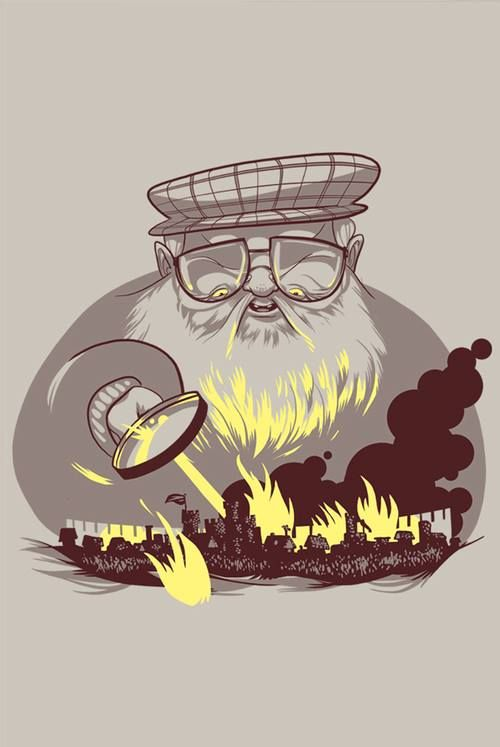

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

## Часть 1. Анализ и предобработка данных

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset
!pip install catboost

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 89.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 80.1MB/s]


Импортируем библиотеки и разделяем датасет

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('game_of_thrones_train.csv', index_col = 'S.No')
test = pd.read_csv('game_of_thrones_test.csv', index_col = 'S.No')

Предобработка данных

In [ ]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [ ]:
data.info()
data.isna().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
male,1557.0,0.590880,0.491829,0.0,0.000000,1.000000,1.000000,1.0
dateOfBirth,279.0,247.551971,61.550441,-25.0,241.000000,272.000000,286.000000,299.0
book1,1557.0,0.138728,0.345774,0.0,0.000000,0.000000,0.000000,1.0
book2,1557.0,0.327553,0.469472,0.0,0.000000,0.000000,1.000000,1.0
book3,1557.0,0.431599,0.495458,0.0,0.000000,0.000000,1.000000,1.0
book4,1557.0,0.562620,0.496223,0.0,0.000000,1.000000,1.000000,1.0
book5,1557.0,0.330122,0.470408,0.0,0.000000,0.000000,1.000000,1.0
isAliveMother,18.0,0.666667,0.485071,0.0,0.000000,1.000000,1.000000,1.0
isAliveFather,22.0,0.227273,0.428932,0.0,0.000000,0.000000,0.000000,1.0
isAliveHeir,21.0,0.666667,0.483046,0.0,0.000000,1.000000,1.000000,1.0


In [ ]:
test.info()
test.isna().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              389 non-null    object 
 1   title             221 non-null    object 
 2   male              389 non-null    int64  
 3   culture           189 non-null    object 
 4   dateOfBirth       154 non-null    float64
 5   mother            3 non-null      object 
 6   father            4 non-null      object 
 7   heir              2 non-null      object 
 8   house             343 non-null    object 
 9   spouse            76 non-null     object 
 10  book1             389 non-null    int64  
 11  book2             389 non-null    int64  
 12  book3             389 non-null    int64  
 13  book4             389 non-null    int64  
 14  book5             389 non-null    int64  
 15  isAliveMother     3 non-null      float64
 16  isAliveFather     4 non-null      float64
 17

,0
name,0
title,168
male,0
culture,200
dateOfBirth,235
mother,386
father,385
heir,387
house,46
spouse,313


In [ ]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
male,389.0,0.732648,0.443148,0.0,0.000000,1.000000,1.000000,1.0
dateOfBirth,154.0,3986.571429,32738.182560,-28.0,239.000000,267.000000,280.000000,298299.0
book1,389.0,0.437018,0.496656,0.0,0.000000,0.000000,1.000000,1.0
book2,389.0,0.562982,0.496656,0.0,0.000000,1.000000,1.000000,1.0
book3,389.0,0.676093,0.468568,0.0,0.000000,1.000000,1.000000,1.0
book4,389.0,0.709512,0.454572,0.0,0.000000,1.000000,1.000000,1.0
book5,389.0,0.655527,0.475808,0.0,0.000000,1.000000,1.000000,1.0
isAliveMother,3.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0
isAliveFather,4.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
isAliveHeir,2.0,0.500000,0.707107,0.0,0.250000,0.500000,0.750000,1.0


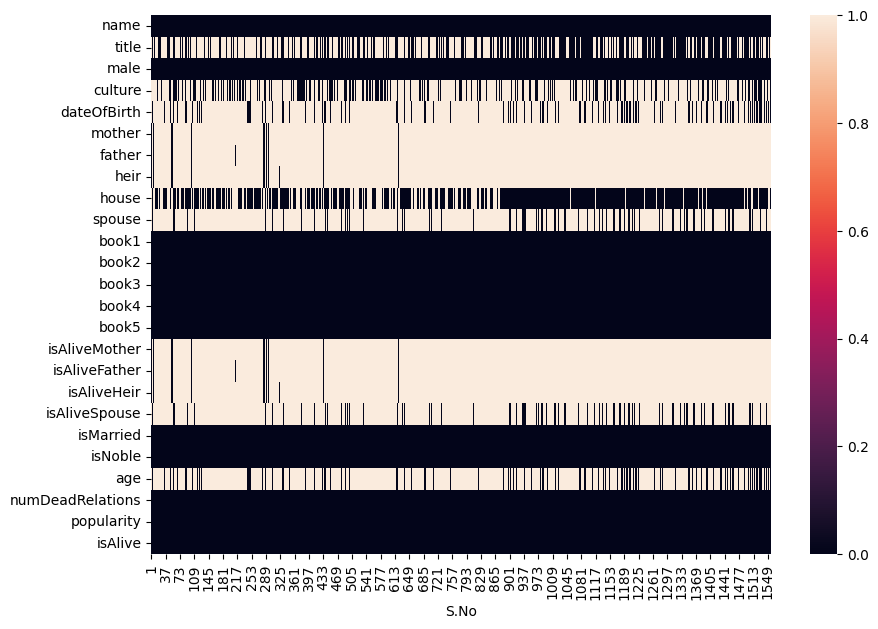

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(data.isna().transpose())
plt.show()

In [ ]:
for column in data.columns:
  na_percentage = round((data[column].isna().sum() / len(data[column])) * 100, 3)
  print(f'{na_percentage} % пропущенных данных у признака {column}')

0.0 % пропущенных данных у признака name
53.95 % пропущенных данных у признака title
0.0 % пропущенных данных у признака male
68.658 % пропущенных данных у признака culture
82.081 % пропущенных данных у признака dateOfBirth
98.844 % пропущенных данных у признака mother
98.587 % пропущенных данных у признака father
98.651 % пропущенных данных у признака heir
24.47 % пропущенных данных у признака house
87.155 % пропущенных данных у признака spouse
0.0 % пропущенных данных у признака book1
0.0 % пропущенных данных у признака book2
0.0 % пропущенных данных у признака book3
0.0 % пропущенных данных у признака book4
0.0 % пропущенных данных у признака book5
98.844 % пропущенных данных у признака isAliveMother
98.587 % пропущенных данных у признака isAliveFather
98.651 % пропущенных данных у признака isAliveHeir
87.155 % пропущенных данных у признака isAliveSpouse
0.0 % пропущенных данных у признака isMarried
0.0 % пропущенных данных у признака isNoble
82.081 % пропущенных данных у признака a

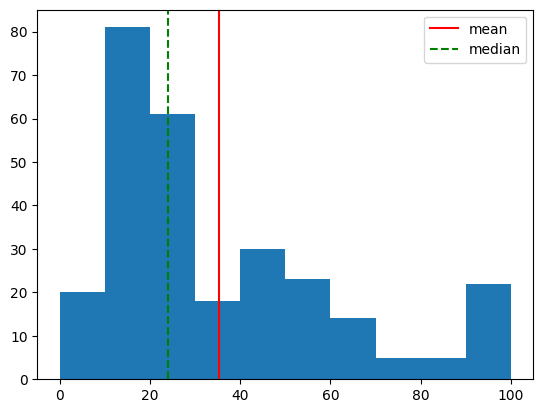

In [ ]:
median_age = data['age'].median()
mean_age = data['age'].mean()
plt.hist(data['age'])

plt.axvline(x=mean_age, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_age, color='g', linestyle = '--', label='median')

plt.legend()
plt.show()


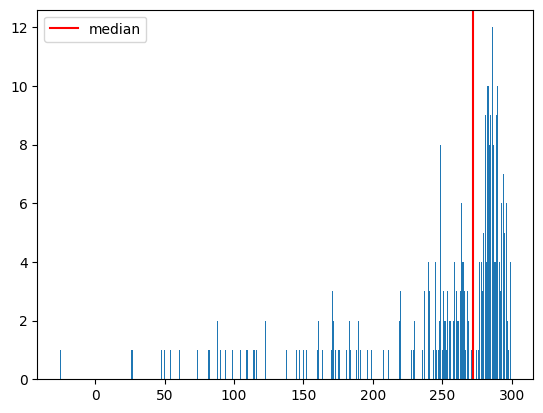

In [ ]:
median_birth = data['dateOfBirth'].median()
birth = data['dateOfBirth'].value_counts()
plt.axvline(x=median_birth, color='r', linestyle = '-', label='median')
plt.bar(birth.index, birth.values)
plt.legend()
plt.show()

In [ ]:
cultures = {
    'summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'asshai': ["asshai'i", 'asshai'],
    'lysene': ['lysene', 'lyseni'],
    'andal': ['andal', 'andals'],
    'braavosi': ['braavosi', 'braavos'],
    'dornish': ['dornishmen', 'dorne', 'dornish'],
    'myrish': ['myr', 'myrish', 'myrmen'],
    'westermen': ['westermen', 'westerman', 'westerlands'],
    'westerosi': ['westeros', 'westerosi'],
    'stormlander': ['stormlands', 'stormlander'],
    'norvoshi': ['norvos', 'norvoshi'],
    'northmen': ['the north', 'northmen'],
    'free Folk': ['wildling', 'first men', 'free folk'],
    'qartheen': ['qartheen', 'qarth'],
    'reach': ['the reach', 'reach', 'reachmen'],
}

def preproces(df):
  median_birth = df['dateOfBirth'].median()
  median_age = df['age'].median()

  df.loc[(pd.isna(df['age'])), 'age'] = median_age
  df.loc[(pd.isna(df['dateOfBirth'])), 'dateOfBirth'] = median_birth

  df.loc[(pd.isna(df['title'])), 'title'] = 'other'
  df.loc[(pd.isna(df['culture'])), 'culture'] = 'other'
  df.loc[(pd.isna(df['house'])), 'house'] = 'other'

  df['isPopular'] = (df['popularity'] >= 0.6).astype(int)
  df['boolDeadRelations'] = (df['numDeadRelations'] > 0).astype(int)

  df['culture'] = df['culture'].str.lower()
  for cult in cultures:
    df['culture'] = df['culture'].replace(cultures[cult], cult)
  return df

data = preproces(data)
test = preproces(test)
data['title'].unique()

array(['other', 'Lord of the Crossing', 'Ser', 'Queen', 'Greenstone',
       'Hand of the King', 'Archmaester', 'Maester', 'Khal', 'red hand',
       'Castellan', 'Seven Kingdoms', 'PrincessQueen',
       'Lord of the Iron Islands', 'Lord', 'Brother', 'Lord of Coldmoat',
       'Prince of Dragonstone', 'Lady', 'PrincessSepta', 'Princess',
       'Septa', 'Grand Maester', 'Septon', 'King', 'Seneschal',
       'Bloodrider', 'Stokeworth', 'Prince', 'LadyQueenDowager Queen',
       'Lord of the Tides', 'Lord of Dragonstone', 'Goodman', 'Wisdom',
       'King in the North', 'Winterfell', 'Steward', 'Eyrie',
       'Casterly Rock', 'Cupbearer', 'Hornwood',
       'Lord Steward of the Iron Islands', 'Blue Grace', 'Red Priest',
       'Khalakka', 'Good Master', 'QueenBlack Bride', 'Last Hearth',
       'Lord Paramount of the Mander', 'Seagard', 'Goodwife', 'Uplands',
       'BrotherProctor', 'Coldmoat', 'Ashford', 'Wind Witch', 'LadyQueen',
       'Broad Arch', 'Brightwater', 'Lady Marya', 'Bl

In [ ]:
print(data['title'].value_counts())

title
other                   840
Ser                     306
Maester                  29
Archmaester              21
Lord                     19
                       ... 
Lord of Greyshield        1
Lord of the Crossing      1
Felwood                   1
Goldgrass                 1
Highgarden                1
Name: count, Length: 196, dtype: int64


In [ ]:
def simplify_title(title):
    if title in ['King', 'Queen', 'Prince', 'Princess', 'Protector of the Realm', 'King of the Andals',
                 'King in the North', 'King-Beyond-the-Wall', 'Prince of Dragonstone', 'Prince of Dorne',
                 'King of the Iron Islands', 'Prince of Winterfell', 'King of Astapor']:
        return "Royalty"

    elif title in ['Lord', 'Lady', 'Lord Paramount', 'Lord Reaper of Pyke', 'Lord of Winterfell',
                   'Lord of Dragonstone', 'Lord of the Tides', 'Lord Steward', 'Lord Commander',
                   'Lady of Darry', 'Lord of Harrenhal', 'Lord of the Crossing', 'Lord of the Marches']:
        return "Lords & Ladies"

    elif title in ['Septon', 'Septa', 'Grand Maester', 'Maester', 'Archmaester', 'Red Priest',
                   'Mistress of whisperers', 'Goodwife', 'Seneschal']:
        return "Clergy"

    elif title in ['Ser', 'Knight', 'Bloodrider', 'First Ranger', 'Master-at-Arms',
                   'Commander of the Second Sons', 'Captain of the Guard', 'First Sword of Braavos',
                   'Khal', 'KhalKo', 'Warlord', 'Lord Commander of the Night’s Watch']:
        return "Knights & Warriors"

    else:
        return "Other"

data['class'] = data['title'].apply(simplify_title)
test['class'] = test['title'].apply(simplify_title)

In [ ]:
def drop_add(df):
  df.drop(columns=["popularity"], inplace=True)
  df.drop(columns=["numDeadRelations"], inplace=True)
  df.drop(columns=["name"], inplace=True)
  df.drop(columns=["mother", "father", "heir", "spouse", "isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse"], inplace=True)
  return df

data = drop_add(data)
test = drop_add(test)

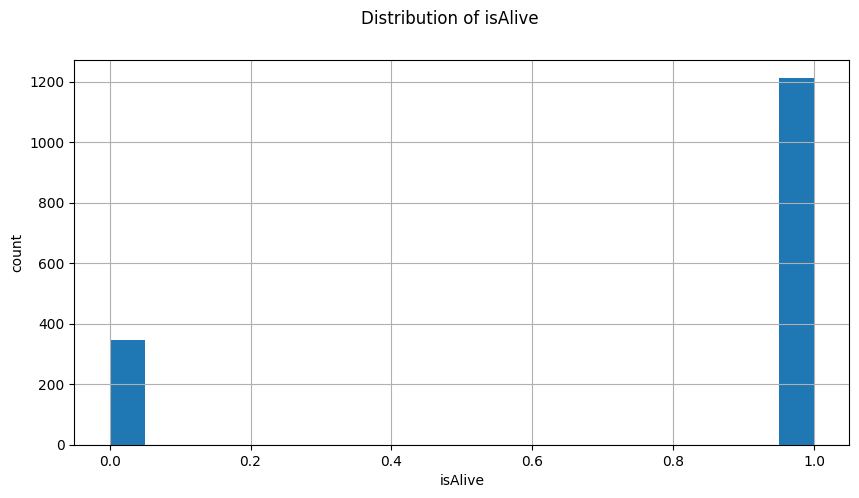

,count
isAlive,
1,1212
0,345


In [ ]:
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('isAlive')

plt.suptitle('Distribution of isAlive')
plt.show()

data['isAlive'].value_counts()

Сбалансированные данные это где-то 2:1, 345/1212 = +- 28%, не очень сбалансированный.

In [ ]:
data = pd.get_dummies(data, columns=['class'], drop_first=True)
test = pd.get_dummies(test, columns=['class'], drop_first=True)

data.drop(columns=['title'], inplace=True)
test.drop(columns=['title'], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['house', 'culture']

def cat_to_num(df):
    categorical_features = df[categorical_columns]
    unprocessing_cat_features = categorical_features.select_dtypes(include=[object]).columns.to_list()

    label_encoding  = LabelEncoder()

    for cols in unprocessing_cat_features:
        df[cols] = label_encoding.fit_transform(df[cols])

    return df

In [ ]:
data = cat_to_num(data)
test = cat_to_num(test)

In [ ]:
numerical_columns = ['male', 'book1', 'book2', 'book3', 'book4',
        'book5', 'isMarried', 'isNoble', 'age', 'isAlive',
       'isPopular', 'boolDeadRelations']

In [ ]:
num_features = data[numerical_columns]

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'book1'}>,
        <Axes: title={'center': 'book2'}>],
       [<Axes: title={'center': 'book3'}>,
        <Axes: title={'center': 'book4'}>,
        <Axes: title={'center': 'book5'}>],
       [<Axes: title={'center': 'isMarried'}>,
        <Axes: title={'center': 'isNoble'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'isAlive'}>,
        <Axes: title={'center': 'isPopular'}>,
        <Axes: title={'center': 'boolDeadRelations'}>]], dtype=object)

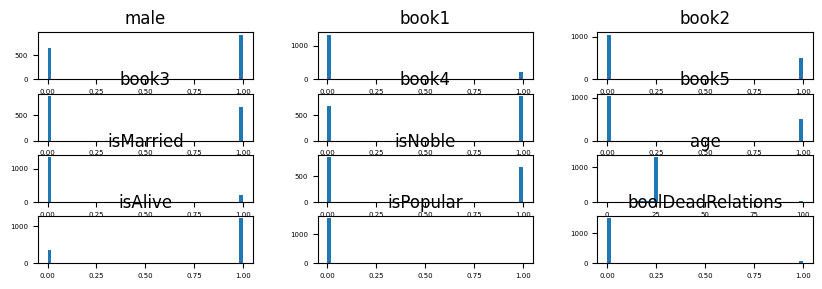

In [ ]:
num_features.hist(figsize=(10, 3), bins=50,xlabelsize=5, ylabelsize=5, grid=False)

In [ ]:
# sns.set()
# sns.pairplot(data, height = 2 ,kind ='scatter',diag_kind='kde')
# plt.show()

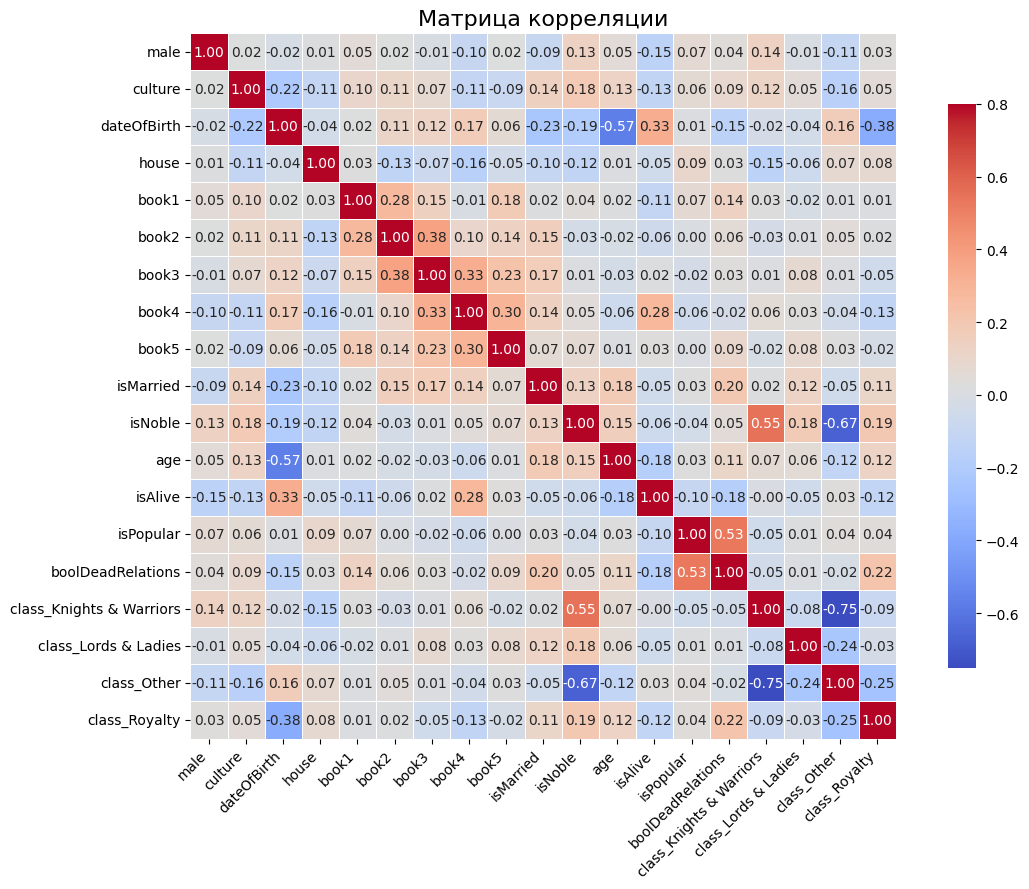

In [ ]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(
    corrmat,
    vmax=.8,
    square=True,
    annot=True,  # Добавляем цифры на карту
    fmt=".2f",   # Формат чисел: два знака после запятой
    cmap="coolwarm",  # Цветовая схема
    linewidths=0.5,   # Толщина линий между ячейками
    cbar_kws={"shrink": 0.8}  # Настройки цветовой шкалы
)

plt.title("Матрица корреляции", fontsize=16)
plt.xticks(rotation=45, ha="right")  # Поворот подписей по оси X
plt.yticks(rotation=0)  # Подписи по оси Y без поворота
plt.tight_layout()  # Автоматическая настройка отступов

plt.show()

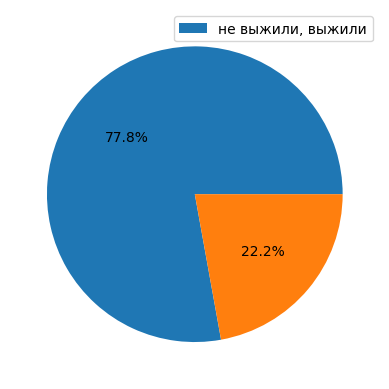

In [ ]:
alive = data['isAlive'].value_counts()

plt.pie(alive, autopct='%1.1f%%')

plt.legend(['не выжили, выжили'])

plt.show()

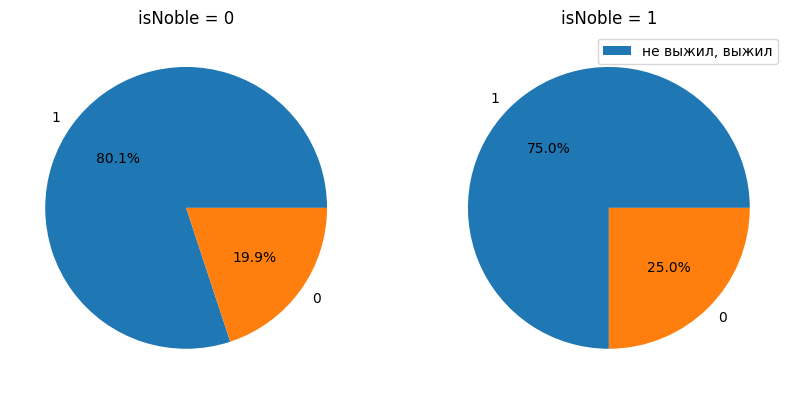

In [ ]:
data1 = data[data['isNoble'] == 0]['isAlive'].value_counts()
data2 = data[data['isNoble'] == 1]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("isNoble = 0")
ax2.set_title("isNoble = 1")

plt.legend(['не выжил, выжил'])

plt.show()

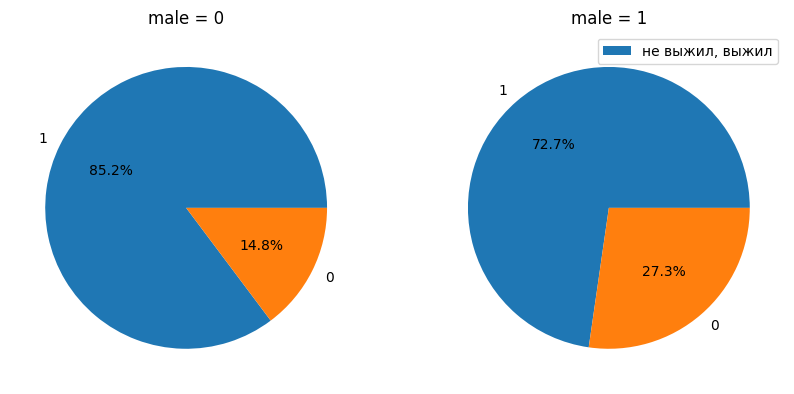

In [ ]:
data1 = data[data['male'] == 0]['isAlive'].value_counts()
data2 = data[data['male'] == 1]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("male = 0")
ax2.set_title("male = 1")

plt.legend(['не выжил, выжил'])

plt.show()

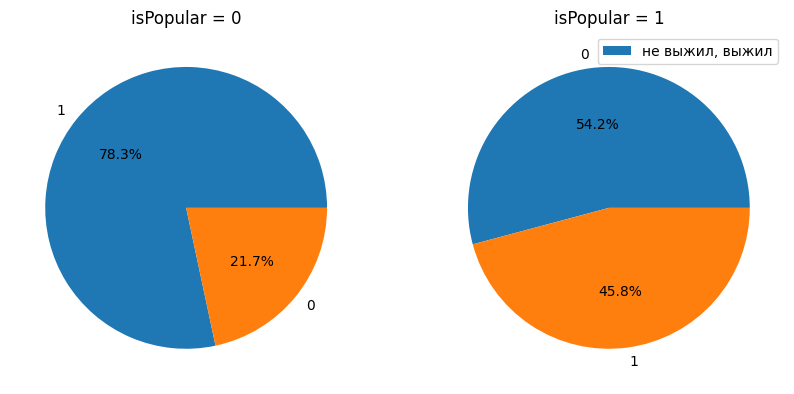

In [ ]:
data1 = data[data['isPopular'] == 0]['isAlive'].value_counts()
data2 = data[data['isPopular'] == 1]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("isPopular = 0")
ax2.set_title("isPopular = 1")

plt.legend(['не выжил, выжил'])

plt.show()

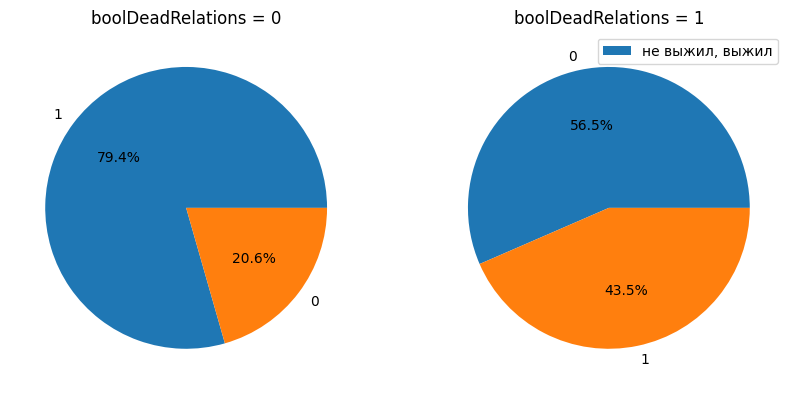

In [ ]:
data1 = data[data['boolDeadRelations'] == 0]['isAlive'].value_counts()
data2 = data[data['boolDeadRelations'] == 1]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title("boolDeadRelations = 0")
ax2.set_title("boolDeadRelations = 1")

plt.legend(['не выжил, выжил'])

plt.show()

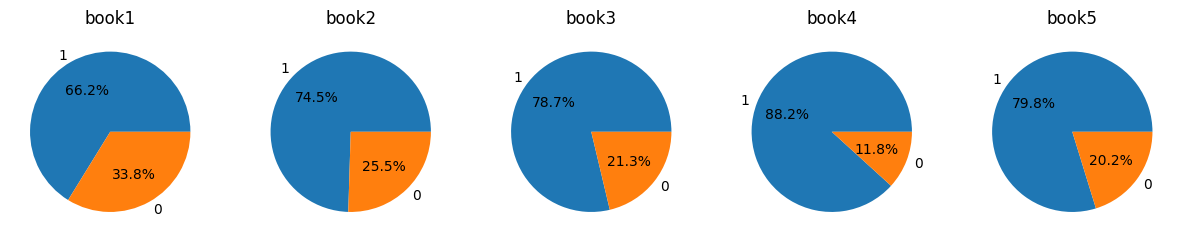

In [ ]:
data1 = data[data['book1'] == 1]['isAlive'].value_counts()
data2 = data[data['book2'] == 1]['isAlive'].value_counts()
data3 = data[data['book3'] == 1]['isAlive'].value_counts()
data4 = data[data['book4'] == 1]['isAlive'].value_counts()
data5 = data[data['book5'] == 1]['isAlive'].value_counts()

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15,10))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')
ax4.pie(data4.values, labels=data4.index, autopct='%1.1f%%')
ax5.pie(data5.values, labels=data5.index, autopct='%1.1f%%')


ax1.set_title("book1")
ax2.set_title("book2")
ax3.set_title("book3")
ax4.set_title("book4")
ax5.set_title("book5")

plt.show()

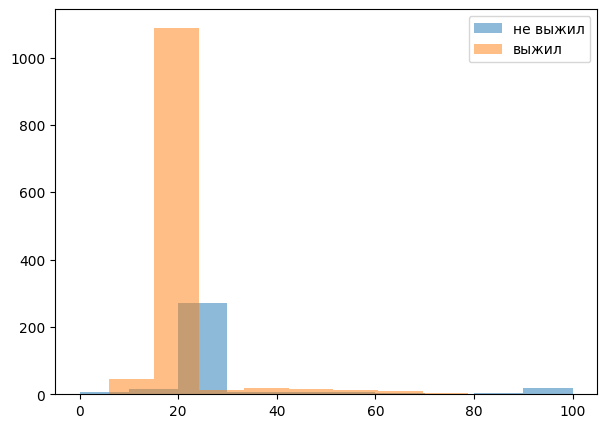

In [ ]:
plt.figure(figsize=(7, 5))

plt.hist(data['age'][data['isAlive'] == 0], alpha=0.5, label='не выжил')
plt.hist(data['age'][data['isAlive'] == 1], alpha=0.5, label='выжил')

plt.legend()


plt.show()

Разделяем признаки на X и Y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(columns = ['isAlive']).values
y = data['isAlive'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test = scaler.transform(test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [ ]:
data.columns.to_list()

['title',
 'male',
 'culture',
 'dateOfBirth',
 'house',
 'book1',
 'book2',
 'book3',
 'book4',
 'book5',
 'isMarried',
 'isNoble',
 'age',
 'isAlive',
 'isPopular',
 'boolDeadRelations',
 'class_Knights & Warriors',
 'class_Lords & Ladies',
 'class_Other',
 'class_Royalty']

## Часть 2. Обучение моделей и оценка качества

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy_result = {}

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
models = {
    "LogisticRegression": LogisticRegression(),
    "AdaBoost": AdaBoostClassifier(),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GaussianProcess": GaussianProcessClassifier(),
    "GaussianNB": GaussianNB(),
    "KNeighbors": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier()
}

# "SVC": SVC(probability=True),

c_values = np.logspace(-4, 4, 50)

param_grids = {
    'LogisticRegression': {
        'C': np.logspace(-4, 4, 50),
        'penalty': ['l2'],
        'solver': ['lbfgs'],
        'max_iter': [10000],
    },

    'AdaBoostClassifier': {
        'n_estimators': [10, 50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'algorithm': ['SAMME', 'SAMME.R']
    },

    'RandomForestClassifier': {
        'n_estimators': [10, 50, 100, 200, 500],
        'max_depth': [None, 10, 20, 30, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy', 'log_loss'],
        'bootstrap': [True, False]
    },

    'GaussianProcessClassifier': {
        'max_iter_predict': [50, 100, 200],
        'n_restarts_optimizer': [0, 1, 2, 3]
    },

    'GaussianNB': {
        'var_smoothing': np.logspace(-9, 0, 10)
    },

    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },

    'SVC': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto', 0.01, 0.1, 1],
        'degree': [2, 3, 4],
        'probability': [True]  # Нужно для predict_proba()
    },

    'DecisionTreeClassifier': {
        'max_depth': [1, 3, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy', 'log_loss'],
        'splitter': ['best', 'random']
    },

    'XGBClassifier': {
        'n_estimators': [50, 100, 200, 500],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'subsample': [0.5, 0.7, 1.0],
        'colsample_bytree': [0.5, 0.7, 1.0],
        'gamma': [0, 0.1, 0.2, 0.3]
    },

    'LGBMClassifier': {
        'n_estimators': [50, 100, 200, 500],
        'max_depth': [-1, 5, 10, 20],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [10, 20, 30, 40],
        'boosting_type': ['gbdt', 'dart'],
        'reg_alpha': [0, 0.1, 0.5, 1.0],
        'reg_lambda': [0, 0.1, 0.5, 1.0]
    },

    'CatBoostClassifier': {
        'iterations': [100, 500, 1000, 5000],
        'depth': [4, 6, 8, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'l2_leaf_reg': [1, 3, 5, 7],
        'border_count': [32, 64, 128]
    }
}

results = {}


In [ ]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, param_grids=None):
    for name, model in models.items():
      print(f'Обучение модели: {name}...')

      if param_grids and name in param_grids:
          grid_search = GridSearchCV(model, param_grids[name], cv=5,scoring='accuracy')
          grid_search.fit(X_train, y_train)
          best_model = grid_search.best_estimator_
          best_params = grid_search.best_params_
      else:
          best_model = model.fit(X_train, y_train)
          best_params = None

      y_pred = best_model.predict(X_test)
      y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, 'predict_proba') else None

      accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

      results[name] = {
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1-score": f1,
          "ROC-AUC": roc_auc
      }

    return results

In [ ]:
results = train_and_evaluate_model(models, X_train, y_train, X_test, y_test, param_grids)
df_results = pd.DataFrame(results).T

Обучение модели: LogisticRegression...
Обучение модели: AdaBoost...
Обучение модели: RandomForest...
Обучение модели: GaussianProcess...
Обучение модели: GaussianNB...
Обучение модели: KNeighbors...
Обучение модели: DecisionTree...
Обучение модели: XGBoost...
Обучение модели: LightGBM...
[LightGBM] [Info] Number of positive: 956, number of negative: 289
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 1245, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.767871 -> initscore=1.196331
[LightGBM] [Info] Start training from score 1.196331


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Обучение модели: CatBoost...
Learning rate set to 0.011313
0:	learn: 0.6869327	total: 1.91ms	remaining: 1.91s
1:	learn: 0.6816072	total: 3.34ms	remaining: 1.66s
2:	learn: 0.6765932	total: 4.21ms	remaining: 1.4s
3:	learn: 0.6701565	total: 5.31ms	remaining: 1.32s
4:	learn: 0.6641516	total: 6.4ms	remaining: 1.27s
5:	learn: 0.6592647	total: 7.53ms	remaining: 1.25s
6:	learn: 0.6540745	total: 8.3ms	remaining: 1.18s
7:	learn: 0.6490500	total: 9.39ms	remaining: 1.16s
8:	learn: 0.6445831	total: 10.4ms	remaining: 1.15s
9:	learn: 0.6391831	total: 11.5ms	remaining: 1.14s
10:	learn: 0.6340878	total: 12.5ms	remaining: 1.12s
11:	learn: 0.6296568	total: 13.5ms	remaining: 1.11s
12:	learn: 0.6259082	total: 14.6ms	remaining: 1.11s
13:	learn: 0.6221505	total: 15.7ms	remaining: 1.1s
14:	learn: 0.6176714	total: 16.7ms	remaining: 1.09s
15:	learn: 0.6142058	total: 17.7ms	remaining: 1.09s
16:	learn: 0.6108105	total: 18.8ms	remaining: 1.08s
17:	learn: 0.6065997	total: 19.8ms	remaining: 1.08s
18:	learn: 0.601549

In [ ]:
df_results

,Accuracy,Precision,Recall,F1-score,ROC-AUC
LogisticRegression,0.878205,0.883803,0.980469,0.929630,0.802246
AdaBoost,0.865385,0.866438,0.988281,0.923358,0.776332
RandomForest,0.858974,0.895522,0.937500,0.916031,0.810024
GaussianProcess,0.875000,0.870307,0.996094,0.928962,0.800363
GaussianNB,0.846154,0.868794,0.957031,0.910781,0.768624
KNeighbors,0.820513,0.881679,0.902344,0.891892,0.733922
DecisionTree,0.788462,0.899160,0.835938,0.866397,0.724888
XGBoost,0.862179,0.898876,0.937500,0.917782,0.829590
LightGBM,0.878205,0.903704,0.953125,0.927757,0.841343
CatBoost,0.897436,0.894366,0.992188,0.940741,0.847935


## Часть 3. Выбор лучшей модели и тестовое предсказание

Лучшая модель по результатм обучения - CatBoost

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 15.8MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
y_prediction = models['CatBoost'].predict(test)

In [ ]:
submission['isAlive'] = y_prediction
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


In [ ]:
submission.value_counts()

,count
isAlive,
1,331
0,58


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
# submission.to_csv("/content/new_submission1.csv", index=False)